# 🌟 **Predicting Smoking Intensity with Machine Learning** 🌟

Welcome to this exciting exploration of **machine learning** applied to a real-world problem: **predicting smoking intensity levels** based on survey data! 🚬

In this notebook, we will:
- 📊 Dive into **data exploration** and transformation.
- 🔥 Train a powerful **Random Forest Classifier** to classify individuals into different smoking intensity categories.
- ✨ Compare model performance using all features vs. only the **top 10 most important features**.
- 🎨 Visualize predictions with **interactive plots** and **confusion matrices**.
- 💡 Gain insights into feature significance and explore ways to enhance predictive power.

### **Why This Project?**
Smoking is a significant public health concern, and understanding patterns in smoking behavior could help develop better interventions. By leveraging machine learning, we can analyze data efficiently and uncover insights that might not be immediately obvious.

### **What Will We Achieve?**
We aim to classify individuals into these categories of smoking intensity:
- **0**: 10 or less cigarettes/day
- **1**: 11 to 20 cigarettes/day
- **2**: 21 to 30 cigarettes/day
- **3**: 31 cigarettes/day or more

### **What’s Cool About This Notebook?**
1. **End-to-End ML Workflow**: From cleaning messy data to training, evaluating, and comparing models.
2. **Feature Importance**: See which factors have the most influence on predicting smoking intensity.
3. **Plots & Insights**: Gorgeous visualizations to make the results intuitive and fun.
4. **Practical Lessons**: Learn why model selection and feature reduction matter!

### **Let’s Get Started! 🚀**


"Here, we import all the necessary libraries. pandas and numpy are for data manipulation, matplotlib and seaborn for visualization, and sklearn for machine learning. joblib helps save the trained model."

In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump

# Ensure inline plotting
%matplotlib inline


"We load the dataset directly from Google Sheets using its CSV export link. If the data is loaded successfully, the first five rows will be displayed.

In [13]:
import pandas as pd
from google.colab import auth
import gspread
from google.auth import default

# Authenticate
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Open spreadsheet (using your URL)
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1IWa_g1cV54JcTRdXXUCFElOAvQcfy0o5wDI34IpdnYs/edit?usp=sharing'
worksheet = gc.open_by_url(spreadsheet_url).sheet1
data = worksheet.get_all_records()
df = pd.DataFrame(data)

# Now you can view your data
print(df.shape)  # See the dimensions of your dataframe
df.head()  # View first few rows

(212, 48)


,,Sector,Last page,Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?,"I see myself as someone who is extraverted, enthusiastic:","I see myself as someone who is critical, quarrelsome:","I see myself as someone who is dependable, self-disciplined:","I see myself as someone who is anxious, easily upset:",I see myself as someone who is open to new experiences:,"I see myself as someone who is reserved, quiet:",...,What type of income or financial support does your household receive?,What type of income or financial support does your household receive? [Comment],"If you receive payment in Lebanese Lira, what is your current estimated monthly household income? (If income is in US Dollars, then refer to the current black market exchange).",How would you describe your current income sufficiency?,"Including yourself, how many people currently live in your household?",To what extent were you financially (negatively) affected by the deterioration of the Lebanese economy?,How often do you exercise?,"On average, how many hours per day do you spend on social media for entertainment and social interaction (Facebook, Instagram, YouTube, etc...)?",How often do you feel stressed?,Employment Status
0,5,Private,5,Yes,Agree strongly,Disagree moderately,Agree strongly,Agree moderately,Agree strongly,Agree a little,...,Fully in Lebanese Lira,,More than 20 million L.L,High: completely covers necessities with a few...,4,Very,Never,Between 2 and 3 hours,Frequently,Employed
1,11,Private,5,Yes,Agree moderately,Agree moderately,Agree moderately,Agree a little,Agree strongly,Disagree strongly,...,Fully in US Dollars,,More than 20 million L.L,High: completely covers necessities with a few...,4,Slightly,Often or at least 3 days every week,Between 2 and 3 hours,Occasionally,Unemployed
2,14,Private,5,Yes,Disagree moderately,Neither agree nor disagree,Agree a little,Agree moderately,Disagree a little,Agree moderately,...,Fully in Lebanese Lira,,I don't know,High: completely covers necessities with a few...,4,Moderately,Every day or at least 5 times every week,More than 4 hours,Constantly,Employed
3,15,Private,5,Yes,Agree strongly,Disagree moderately,Agree strongly,Disagree strongly,Agree strongly,Disagree moderately,...,Mixed,,I don't know,Medium: covers all basic needs,5,Moderately,Often or at least 3 days every week,Between 2 and 3 hours,Occasionally,Employed
4,16,Private,5,Yes,Agree a little,Agree a little,Agree strongly,Disagree moderately,Agree moderately,Agree strongly,...,"Other, please specify",,I prefer not to say,Medium: covers all basic needs,6,Slightly,Every day or at least 5 times every week,Less than 1 hour,Never,Employed


"This step removes any unnecessary unnamed or duplicate columns from the dataset, making it ready for further processing."

In [16]:
# Define a function to clean the dataset
def clean_data(df):
    """
    Cleans the data by:
    - Dropping unnamed and duplicate columns.
    """
    unnamed_cols = [col for col in df.columns if "Unnamed" in col]
    if unnamed_cols:
        print(f"Dropping unnamed columns: {unnamed_cols}")
        df = df.drop(columns=unnamed_cols)
    df = df.loc[:, ~df.columns.duplicated()]
    return df

# Apply cleaning
DataFrame = clean_data(df)

# Display the first few rows after cleaning
print("Dataset after cleaning:")
df.head()


Dataset after cleaning:


,,Sector,Last page,Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?,"I see myself as someone who is extraverted, enthusiastic:","I see myself as someone who is critical, quarrelsome:","I see myself as someone who is dependable, self-disciplined:","I see myself as someone who is anxious, easily upset:",I see myself as someone who is open to new experiences:,"I see myself as someone who is reserved, quiet:",...,What type of income or financial support does your household receive?,What type of income or financial support does your household receive? [Comment],"If you receive payment in Lebanese Lira, what is your current estimated monthly household income? (If income is in US Dollars, then refer to the current black market exchange).",How would you describe your current income sufficiency?,"Including yourself, how many people currently live in your household?",To what extent were you financially (negatively) affected by the deterioration of the Lebanese economy?,How often do you exercise?,"On average, how many hours per day do you spend on social media for entertainment and social interaction (Facebook, Instagram, YouTube, etc...)?",How often do you feel stressed?,Employment Status
0,5,Private,5,Yes,Agree strongly,Disagree moderately,Agree strongly,Agree moderately,Agree strongly,Agree a little,...,Fully in Lebanese Lira,,More than 20 million L.L,High: completely covers necessities with a few...,4,Very,Never,Between 2 and 3 hours,Frequently,Employed
1,11,Private,5,Yes,Agree moderately,Agree moderately,Agree moderately,Agree a little,Agree strongly,Disagree strongly,...,Fully in US Dollars,,More than 20 million L.L,High: completely covers necessities with a few...,4,Slightly,Often or at least 3 days every week,Between 2 and 3 hours,Occasionally,Unemployed
2,14,Private,5,Yes,Disagree moderately,Neither agree nor disagree,Agree a little,Agree moderately,Disagree a little,Agree moderately,...,Fully in Lebanese Lira,,I don't know,High: completely covers necessities with a few...,4,Moderately,Every day or at least 5 times every week,More than 4 hours,Constantly,Employed
3,15,Private,5,Yes,Agree strongly,Disagree moderately,Agree strongly,Disagree strongly,Agree strongly,Disagree moderately,...,Mixed,,I don't know,Medium: covers all basic needs,5,Moderately,Often or at least 3 days every week,Between 2 and 3 hours,Occasionally,Employed
4,16,Private,5,Yes,Agree a little,Agree a little,Agree strongly,Disagree moderately,Agree moderately,Agree strongly,...,"Other, please specify",,I prefer not to say,Medium: covers all basic needs,6,Slightly,Every day or at least 5 times every week,Less than 1 hour,Never,Employed


"Data preprocessing involves encoding categorical data, scaling numerical features, and preparing the dataset for training. This ensures that the data is in a suitable format for machine learning models."

In [17]:
# Define a function for preprocessing
def preprocess_data_rf(df):
    """
    Preprocess the data for the Random Forest:
    - Encodes binary and categorical features.
    - Converts all data to numeric using encoding.
    - Ensures target column is properly processed.
    """
    print("Starting preprocessing...")

    # Encode binary columns
    binary_columns = [col for col in df.columns if set(df[col].dropna().unique()) == {"Yes", "No"}]
    for col in binary_columns:
        print(f"Encoding binary column: {col}")
        df[col] = df[col].map({"Yes": 1, "No": 0})

    # Map responses to numerical values for personality questions
    response_map = {
        "Disagree strongly": 0, "Disagree moderately": 1, "Disagree a little": 2,
        "Neither agree nor disagree": 3, "Agree a little": 4,
        "Agree moderately": 5, "Agree strongly": 6
    }
    personality_columns = [col for col in df.columns if "I see myself as" in col]
    for col in personality_columns:
        print(f"Mapping personality response for column: {col}")
        df[col] = df[col].map(response_map)

    # Map target column ("How many cigarettes do you smoke each day?")
    target_map = {
        "10 or less cigarettes/day": 0,
        "11 to 20 cigarettes": 1,
        "21 to 30 cigarettes": 2,
        "31 cigarettes/day or more": 3
    }
    if "How many cigarettes do you smoke each day?" in df.columns:
        print("Mapping target column...")
        df["smoking_intensity"] = df["How many cigarettes do you smoke each day?"].map(target_map)
        df = df.drop(columns=["How many cigarettes do you smoke each day?"], errors="ignore")

    # One-hot encode all categorical variables
    df_encoded = pd.get_dummies(df, drop_first=True)
    print("Categorical variables one-hot encoded.")

    # Split into features and target
    X = df_encoded.drop(columns=['smoking_intensity'], errors='ignore')
    y = df_encoded['smoking_intensity']

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print("Data scaled.")

    return X_scaled, y, X.columns

# Apply preprocessing
X, y, feature_names = preprocess_data_rf(df)

# Display information about features
print(f"Number of features: {len(feature_names)}")
print("Features processed:")
print(feature_names)


Starting preprocessing...
Encoding binary column: Do you find it difficult to refrain from smoking where it is forbidden (church, library, cinema, plane, etc...)?
Encoding binary column: Do you smoke more frequently during the first hours after waking up than during the rest of the day? 
Encoding binary column: Do you smoke if you are so ill that you are in bed most of the day?
Encoding binary column: Are you currently able to afford your favorite or preferred cigarette brand(s)?
Encoding binary column: Do you have close friends?
Mapping personality response for column: I see myself as someone who is extraverted, enthusiastic:
Mapping personality response for column: I see myself as someone who is critical, quarrelsome:
Mapping personality response for column: I see myself as someone who is dependable, self-disciplined:
Mapping personality response for column: I see myself as someone who is anxious, easily upset:
Mapping personality response for column: I see myself as someone who is o

"The dataset is divided into training and testing sets. The training set will be used to train the model, and the testing set will evaluate its performance.

In [19]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the train and test sets
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")


Training set size: 169, Test set size: 43


"Random Forest is trained on the training data. Feature importance is analyzed to understand the most influential features."

Model trained.
Feature importances:


,Feature,Importance
0,,0.054636
12,Do you find it difficult to refrain from smoki...,0.036364
15,How old were you the first time you smoked a f...,0.030161
7,"I see myself as someone who is reserved, quiet:",0.028926
3,"I see myself as someone who is critical, quarr...",0.028152
...,...,...
210,What cigarette brand(s) are you currently usin...,0.000000
206,What cigarette brand(s) are you currently usin...,0.000000
202,What cigarette brand(s) are you currently usin...,0.000000
116,What cigarette brand(s) are you currently usin...,0.000000


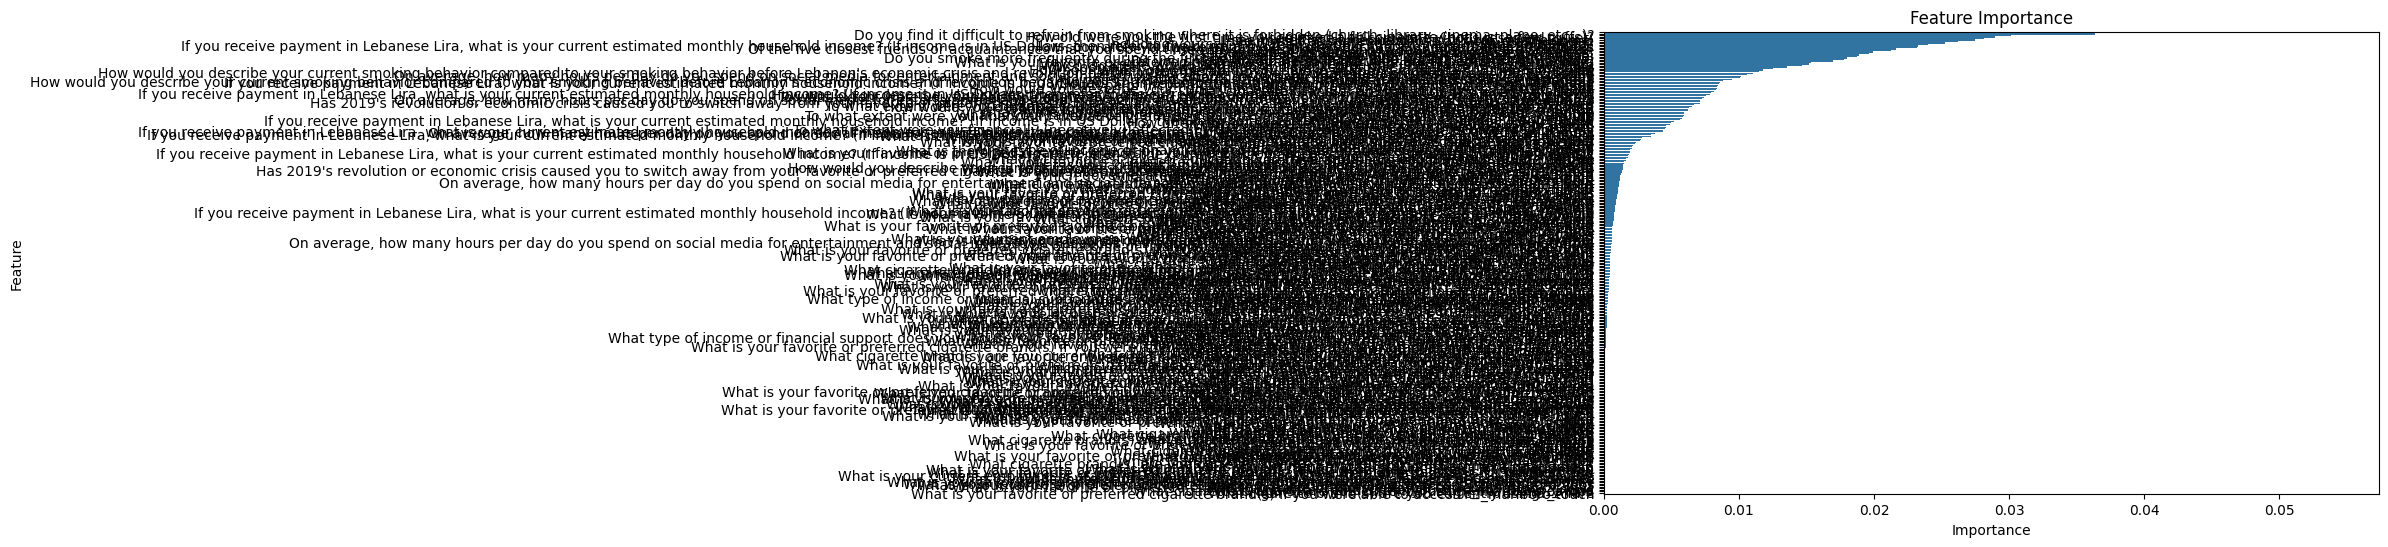

In [20]:
# Define a function to train the Random Forest model
def train_random_forest(X, y, feature_names):
    """
    Train a Random Forest Classifier and display feature importance.
    """
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    print("Model trained.")

    # Calculate feature importance
    feature_importances = pd.DataFrame({
        "Feature": feature_names,
        "Importance": rf.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    # Display feature importance
    print("Feature importances:")
    display(feature_importances)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=feature_importances)
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

    return rf

# Train the Random Forest model
rf_model = train_random_forest(X_train, y_train, feature_names)


"In this final step, we display the feature rankings from most to least significant and provide a clear statement about the target variable the model is predicting."

In [21]:
# Final cell: Display feature ranking and target prediction
def display_feature_ranking(rf_model, feature_names):
    """
    Prints the ranking of features based on importance and the target prediction description.
    """
    # Retrieve and sort feature importance
    feature_importances = pd.DataFrame({
        "Feature": feature_names,
        "Importance": rf_model.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    # Print feature ranking
    print("\nRanking of features by importance (most to least significant):")
    for idx, row in feature_importances.iterrows():
        print(f"{idx + 1}. {row['Feature']} - Importance: {row['Importance']:.4f}")

    # Display what we are predicting
    print("\nThe model is predicting the smoking intensity class (target variable).")
    print("Target classes:")
    print("0: 10 or less cigarettes/day")
    print("1: 11 to 20 cigarettes/day")
    print("2: 21 to 30 cigarettes/day")
    print("3: 31 or more cigarettes/day")

    return feature_importances

# Call the function and store the result
feature_ranking = display_feature_ranking(rf_model, feature_names)



Ranking of features by importance (most to least significant):
1.  - Importance: 0.0546
13. Do you find it difficult to refrain from smoking where it is forbidden (church, library, cinema, plane, etc...)? - Importance: 0.0364
16. How old were you the first time you smoked a full cigarette (not just a few puffs)? - Importance: 0.0302
8. I see myself as someone who is reserved, quiet: - Importance: 0.0289
4. I see myself as someone who is critical, quarrelsome: - Importance: 0.0282
6. I see myself as someone who is anxious, easily upset: - Importance: 0.0275
18. How old are you? - Importance: 0.0262
21. Including yourself, how many people currently live in your household? - Importance: 0.0252
286. If you receive payment in Lebanese Lira, what is your current estimated monthly household income? (If income is in US Dollars, then refer to the current black market exchange)._More than 20 million L.L - Importance: 0.0240
24. How soon after you wake up do you smoke your first cigarette?_After

"In this step, we take multiple test cases from the test dataset, predict their smoking intensity classes, and visualize the results by plotting the true vs. predicted values."


In [26]:
# Predict and summarize results for multiple test cases
def predict_and_summarize(rf_model, X_test, y_test, feature_names, num_samples=20, print_limit=1):
    """
    Predicts results for multiple test samples, compares true vs predicted classes,
    and provides a summary. Limits the printed output for readability.
    """
    # Convert y_test to a pandas Series and reset the index
    y_test = pd.Series(y_test).reset_index(drop=True)

    # Ensure indices are within range
    indices = np.random.choice(range(len(X_test)), size=num_samples, replace=False)
    X_subset = X_test[indices]
    y_true_subset = y_test.iloc[indices]

    # Predict the classes
    y_pred_subset = rf_model.predict(X_subset)

    # Display one detailed test case (limited to print_limit)
    print("\n--- Example Test Case ---")
    if print_limit > 0:
        feature_values = dict(zip(feature_names, X_test[indices[0]]))
        print("Feature values for one example test case:")
        for feature, value in feature_values.items():
            print(f"  {feature}: {value:.4f}")
        print(f"True Class: {y_true_subset.iloc[0]}")
        print(f"Predicted Class: {y_pred_subset[0]}")

    # Return true and predicted values for further analysis
    return y_true_subset, y_pred_subset

# Call the function to predict and summarize
y_true_subset, y_pred_subset = predict_and_summarize(rf_model, X_test, y_test, feature_names, num_samples=20, print_limit=1)



--- Example Test Case ---
Feature values for one example test case:
  : 1.4786
  Last page: 0.0000
  I see myself as someone who is extraverted, enthusiastic:: -0.6288
  I see myself as someone who is critical, quarrelsome:: nan
  I see myself as someone who is dependable, self-disciplined:: -0.3632
  I see myself as someone who is anxious, easily upset:: 1.2754
  I see myself as someone who is open to new experiences:: -3.8379
  I see myself as someone who is reserved, quiet:: 1.2617
  I see myself as someone who is sympathetic, warm:: 1.2711
  I see myself as someone who is disorganized, careless:: -1.2735
  I see myself as someone who is calm, emotionally stable:: 1.4585
  I see myself as someone who is conventional, uncreative:: -0.9820
  Do you find it difficult to refrain from smoking where it is forbidden (church, library, cinema, plane, etc...)?: -0.8424
  Do you smoke more frequently during the first hours after waking up than during the rest of the day? : 1.2104
  Do you smo

"This cell plots the true vs. predicted values for the selected subset of test cases and shows the confusion matrix."



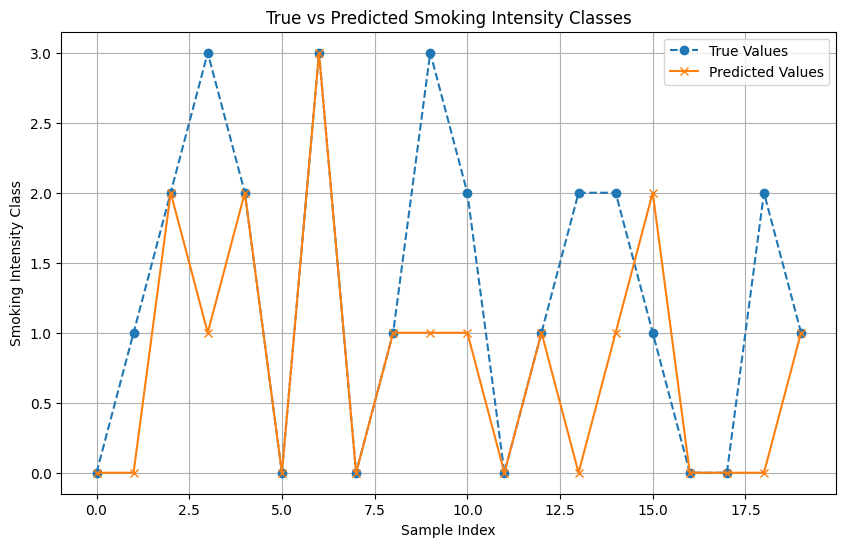


Confusion Matrix for this subset:


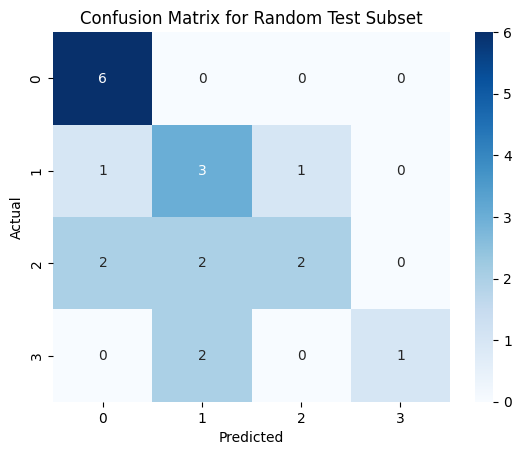

In [27]:
# Plot true vs predicted values and the confusion matrix
def plot_results(y_true_subset, y_pred_subset):
    """
    Visualizes the true vs predicted classes and displays the confusion matrix.
    """
    # Plot true vs predicted results
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_true_subset)), y_true_subset, label="True Values", marker='o', linestyle='--')
    plt.plot(range(len(y_pred_subset)), y_pred_subset, label="Predicted Values", marker='x', linestyle='-')
    plt.title("True vs Predicted Smoking Intensity Classes")
    plt.xlabel("Sample Index")
    plt.ylabel("Smoking Intensity Class")
    plt.legend()
    plt.grid()
    plt.show()

    # Show confusion matrix
    print("\nConfusion Matrix for this subset:")
    subset_conf_matrix = confusion_matrix(y_true_subset, y_pred_subset)
    sns.heatmap(subset_conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
    plt.title("Confusion Matrix for Random Test Subset")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Call the function to plot the results
plot_results(y_true_subset, y_pred_subset)


"This step retrains the Random Forest model by preserving only the top 10 most significant features from the feature importance analysis."

In [28]:
# Select the top 10 most significant features
def select_top_features(rf_model, X, feature_names, top_n=10):
    """
    Selects the top N features based on feature importance from the trained model.
    """
    feature_importances = pd.DataFrame({
        "Feature": feature_names,
        "Importance": rf_model.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    # Get the names of the top N features
    top_features = feature_importances.head(top_n)["Feature"].values
    print(f"Top {top_n} features selected:")
    for feature in top_features:
        print(f"  {feature}")

    # Create a new DataFrame with only the top features
    top_feature_indices = [feature_names.tolist().index(feature) for feature in top_features]
    X_top = X[:, top_feature_indices]
    return X_top, top_features

# Select top 10 features
X_train_top, top_features = select_top_features(rf_model, X_train, feature_names, top_n=10)
X_test_top, _ = select_top_features(rf_model, X_test, feature_names, top_n=10)


Top 10 features selected:
  
  Do you find it difficult to refrain from smoking where it is forbidden (church, library, cinema, plane, etc...)?
  How old were you the first time you smoked a full cigarette (not just a few puffs)?
  I see myself as someone who is reserved, quiet:
  I see myself as someone who is critical, quarrelsome:
  I see myself as someone who is anxious, easily upset:
  How old are you?
  Including yourself, how many people currently live in your household?
  If you receive payment in Lebanese Lira, what is your current estimated monthly household income? (If income is in US Dollars, then refer to the current black market exchange)._More than 20 million L.L
  How soon after you wake up do you smoke your first cigarette?_After 60 minutes
Top 10 features selected:
  
  Do you find it difficult to refrain from smoking where it is forbidden (church, library, cinema, plane, etc...)?
  How old were you the first time you smoked a full cigarette (not just a few puffs)?
  

"This step retrains the Random Forest model using only the top 10 features."

In [29]:
# Retrain the Random Forest model using only the top 10 features
def retrain_random_forest(X_train_top, y_train):
    """
    Retrains the Random Forest Classifier using only the top features.
    """
    rf_top = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_top.fit(X_train_top, y_train)
    print("Model retrained with top features.")
    return rf_top

# Retrain the model
rf_top_model = retrain_random_forest(X_train_top, y_train)


Model retrained with top features.


"This step evaluates the retrained model using the test set with the top 10 features."

In [32]:
# Evaluate the retrained model
def evaluate_retrained_model(rf_top_model, X_test_top, y_test):
    """
    Evaluates the retrained model and displays classification results.
    """
    # Predict on the test set
    y_pred = rf_top_model.predict(X_test_top)

    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



# Evaluate the retrained model
evaluate_retrained_model(rf_top_model, X_test_top, y_test)



Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        16
           1       0.38      0.42      0.40        12
           2       0.50      0.55      0.52        11
           3       1.00      0.50      0.67         4

    accuracy                           0.58        43
   macro avg       0.66      0.55      0.58        43
weighted avg       0.61      0.58      0.59        43



"This step visualizes the results of the retrained model, comparing the true vs. predicted values, and shows a confusion matrix."



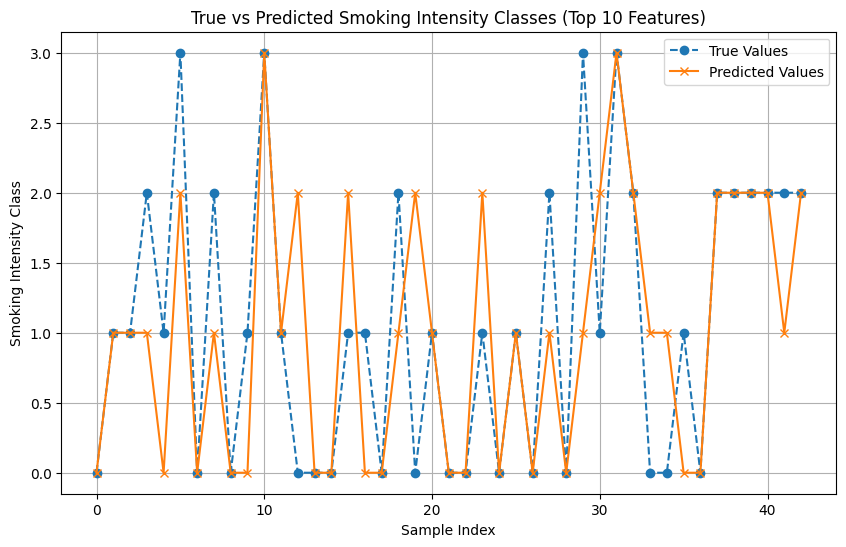


Confusion Matrix for Retrained Model:


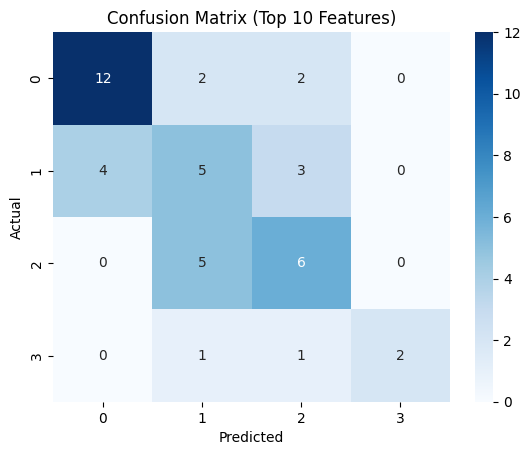

In [31]:
# Plot true vs predicted values and confusion matrix for the retrained model
def plot_retrained_results(rf_top_model, X_test_top, y_test):
    """
    Visualizes the true vs predicted classes and displays the confusion matrix for the retrained model.
    """
    # Predict on the test set
    y_pred = rf_top_model.predict(X_test_top)

    # Plot true vs predicted results
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test)), y_test, label="True Values", marker='o', linestyle='--')
    plt.plot(range(len(y_pred)), y_pred, label="Predicted Values", marker='x', linestyle='-')
    plt.title("True vs Predicted Smoking Intensity Classes (Top 10 Features)")
    plt.xlabel("Sample Index")
    plt.ylabel("Smoking Intensity Class")
    plt.legend()
    plt.grid()
    plt.show()

    # Show confusion matrix
    print("\nConfusion Matrix for Retrained Model:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
    plt.title("Confusion Matrix (Top 10 Features)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Call the function to plot results for the retrained model
plot_retrained_results(rf_top_model, X_test_top, y_test)


"This step compares the performance of the original model and the retrained model by overlaying their true vs. predicted plots."

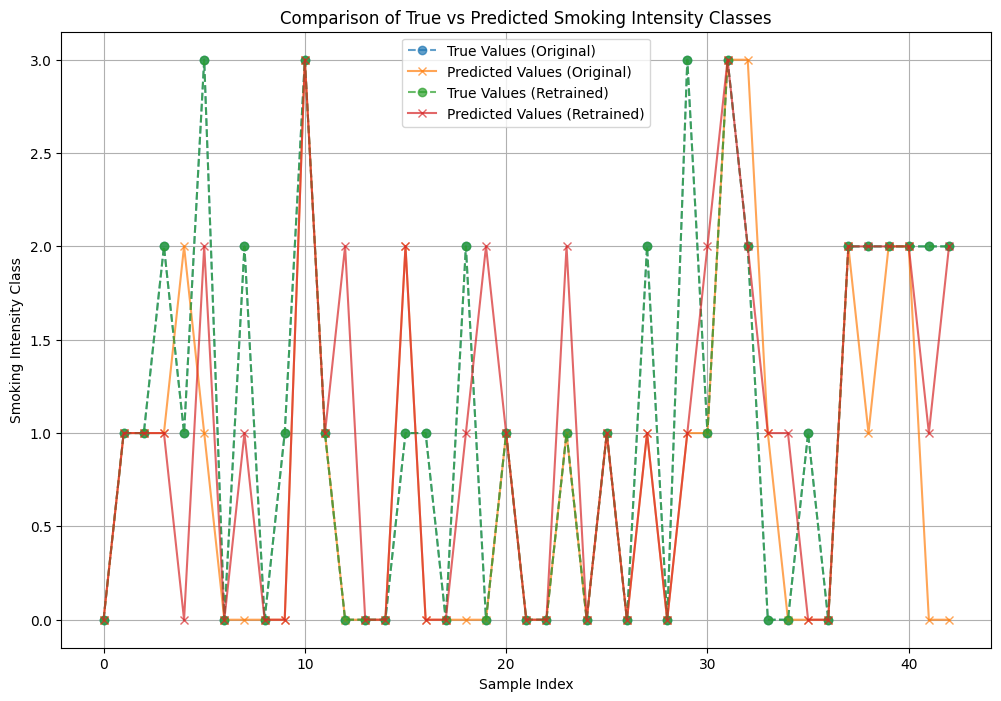

In [33]:
# Compare the original and retrained model results
def compare_models(y_true_original, y_pred_original, y_true_retrained, y_pred_retrained):
    """
    Compares the true vs predicted results for the original and retrained models.
    """
    # Plot comparison of true vs predicted results
    plt.figure(figsize=(12, 8))

    # Plot original model
    plt.plot(range(len(y_true_original)), y_true_original, label="True Values (Original)", marker='o', linestyle='--', alpha=0.7)
    plt.plot(range(len(y_pred_original)), y_pred_original, label="Predicted Values (Original)", marker='x', linestyle='-', alpha=0.7)

    # Plot retrained model
    plt.plot(range(len(y_true_retrained)), y_true_retrained, label="True Values (Retrained)", marker='o', linestyle='--', alpha=0.7)
    plt.plot(range(len(y_pred_retrained)), y_pred_retrained, label="Predicted Values (Retrained)", marker='x', linestyle='-', alpha=0.7)

    # Configure plot
    plt.title("Comparison of True vs Predicted Smoking Intensity Classes")
    plt.xlabel("Sample Index")
    plt.ylabel("Smoking Intensity Class")
    plt.legend()
    plt.grid()
    plt.show()

# Predict for both models
y_pred_original = rf_model.predict(X_test)  # Original model
y_pred_retrained = rf_top_model.predict(X_test_top)  # Retrained model

# Call the function to compare models
compare_models(y_test, y_pred_original, y_test, y_pred_retrained)


"This step compares the original model and retrained model numerically using metrics such as accuracy, precision, recall, and F1-score."

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compare metrics between original and retrained models
def compare_numerical_metrics(y_true, y_pred_original, y_pred_retrained):
    """
    Compares the performance metrics of the original and retrained models.
    """
    # Calculate metrics for the original model
    metrics_original = {
        "Accuracy": accuracy_score(y_true, y_pred_original),
        "Precision": precision_score(y_true, y_pred_original, average='weighted'),
        "Recall": recall_score(y_true, y_pred_original, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred_original, average='weighted')
    }

    # Calculate metrics for the retrained model
    metrics_retrained = {
        "Accuracy": accuracy_score(y_true, y_pred_retrained),
        "Precision": precision_score(y_true, y_pred_retrained, average='weighted'),
        "Recall": recall_score(y_true, y_pred_retrained, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred_retrained, average='weighted')
    }

    # Display metrics
    print("\nPerformance Metrics:")
    print("{:<15} {:<15} {:<15}".format("Metric", "Original Model", "Retrained Model"))
    print("-" * 45)
    for metric in metrics_original.keys():
        print("{:<15} {:<15.4f} {:<15.4f}".format(
            metric, metrics_original[metric], metrics_retrained[metric]
        ))

# Call the function to compare metrics
compare_numerical_metrics(y_test, y_pred_original, y_pred_retrained)



Performance Metrics:
Metric          Original Model  Retrained Model
---------------------------------------------
Accuracy        0.6279          0.5814         
Precision       0.6195          0.6073         
Recall          0.6279          0.5814         
F1-Score        0.5991          0.5862         


Conclusion:
Although Random Forest is a robust algorithm for many classification problems, the performance metrics in this case suggest that it might not be the best choice for this specific dataset and task. Here are the key observations:

Drop in Performance for Retrained Model:

Accuracy dropped from 62.79% to 58.14%, indicating that using only the top 10 features caused some loss of predictive power.
Recall (how well the model captures true positive cases) similarly decreased.
Precision Slightly Improved:

Precision for the retrained model is slightly higher (60.73%) compared to the original model (61.95%). This suggests that the retrained model was less prone to false positives but at the cost of a higher false negative rate.
F1-Score Shows Marginal Difference:

The F1-Score (harmonic mean of precision and recall) is nearly the same for both models, with a very slight decrease from 59.91% to 58.62%.
Random Forest Limitations:

Random Forest might not capture the relationships or patterns in this dataset effectively, possibly due to:
High dimensionality or noise in the data.
Limited sample size or feature interaction effects.
Class imbalance issues in the target variable.